In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import torch


from PIL import Image
import torch
from torchvision import models, transforms
from sklearn.neighbors import NearestNeighbors
import os
import glob

import faiss

import clip
from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Model
- https://github.com/mlfoundations/open_clip
- https://github.com/openai/CLIP/blob/main/README.md
- CLIP

In [3]:
model, preprocess = clip.load("ViT-B/32", device=device)

### Image Embedding

In [4]:
# Walk into directoies to find images and convert them to vectors
image_paths = []
features = []
for root, dirs, files in os.walk('datasets/'):
    for file in files:
        if file.endswith((".jpg", ".tif", ".png")):
            file_path = os.path.join(root, file)
            image_paths.append(file_path)

            img = Image.open(file_path)
            
            with torch.no_grad():
                feature = model.encode_image(preprocess(img).unsqueeze(0).to(device)).detach().cpu().numpy()
            features.append(feature)


print(len(features), ' Images Found!')
f = np.concatenate(features, axis=0)

5071  Images Found!


- Took 39s on NVIDIA 3060

### NN Search

In [ ]:
# Text Embedding (Query feature)
query = 'Antonov An-225 Mriya'
query = clip.tokenize(query).to(device)
query = model.encode_text(query).detach().cpu()


In [17]:
# NN Search
k = 20
neigh = NearestNeighbors(n_neighbors=k, algorithm='brute')

In [18]:
neigh.fit(f)
distances, indices = neigh.kneighbors(query)

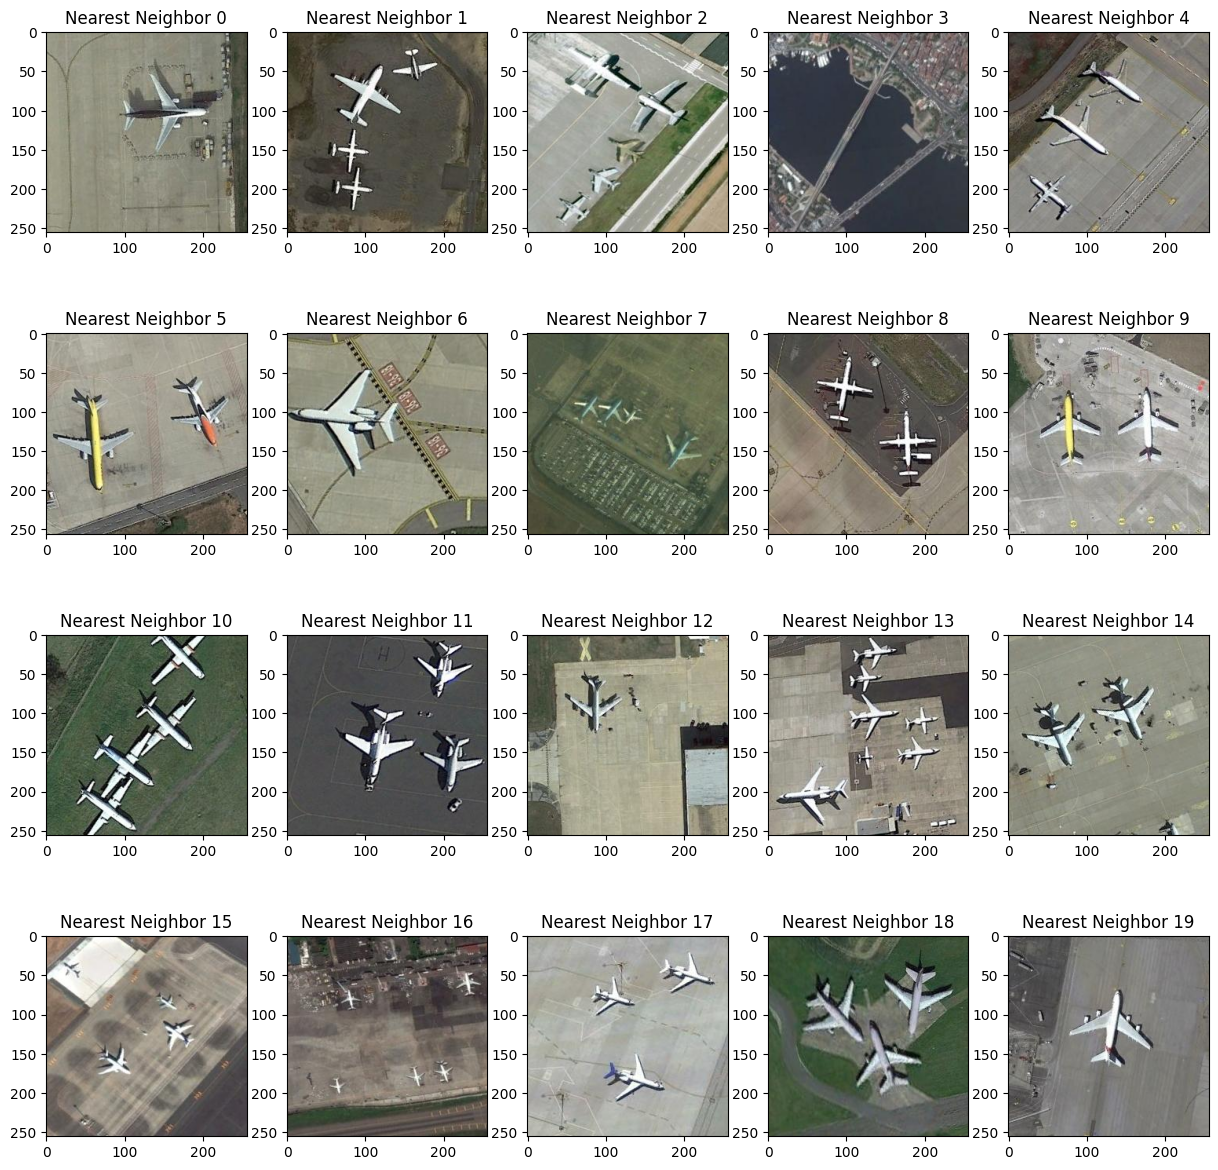

In [19]:

# Plot query image
rows, columns = 4, 5
fig, axs = plt.subplots(rows, columns, figsize=(15, 15))


n = 0
for i in range(rows):
    for j in range(columns):

        axs[i][j].imshow(Image.open(image_paths[indices[0][n]]))
        axs[i][j].set_title(f'Nearest Neighbor {n}')
        n += 1
plt.show()